# PHYS 381 - Assignment 1
### Siegfried Peschke - 30032136
#### January 21, 2019

## Introduction
This assignment will explore Legendre polynomials and three methods of evaluating mathematical functions in order to find their roots.

## Task 1 - Plotting Legendre Polynomials
### Use `numpy.polynomial.legendre` to generate a single plot showing the first five Legendre polynomials  with degree from $N=1$ up to and including $N=5$ between $x=−1$ and $x=+1$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

Begin by creating a function to generate the Legendre polynomials in an array. The n'th element of the array will be an unevaluated Legendre polynomial of a degree N.

In [2]:
def gen_legendre(N):
    '''
    Function generates Legendre polynomials from 1 up to and including the input parameter N.
    
    Parameters:
        N: Dictates the highest degree of Legendre polynomial generated.
    Returns:
        store: A list storing each Legendre polynomial, poly, from lowest order to highest.
    '''
    store = [] #A list to store our polynomials
    for i in range(1, N+1): #Must shift by 1 to accomodate how Legendre.basis calculates the polynomial
        poly = np.polynomial.legendre.Legendre.basis(i) #Generate the Legendre polynomial
        store = np.append(store, poly) #Store the polynomial
    return store

Now we create a function to generate a plot for the Legendre polynomials from degree $N=1$ up to and including $N=5$.

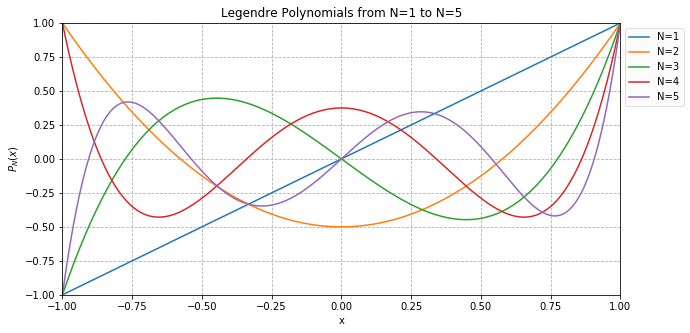

In [3]:
def gen_leg_plot(N):
    '''
    Function generates a plot of Legendre polynomials from 1 up to and including the input parameter N.
    
    Parameters:
        N: Dictates the highest degree of Legendre polynomial generated.
    Returns:
        A plot of Legendre polynomials.
    '''
    #Gridlines
    plt.figure(figsize=(10,5))
    plt.axis([-1, 1, -1, 1])
    plt.xticks(np.arange(-1, 1 + 0.25, 0.25))
    plt.yticks(np.arange(-1, 1 + 0.25, 0.25))
    plt.grid(linestyle='dashed')
    #Labels
    plt.xlabel('x')
    plt.ylabel('$P_{N}(x)$')
    plt.title('Legendre Polynomials from N=1 to N=' + str(N))
    
    #Create the domain to be plotted
    t = np.arange(-1, 1 + 0.01, 0.01)

    #Function to be plotted
    for i in range(N):
        poly_name = "N=" + str(i+1)
        plt.plot(t, gen_legendre(N)[i](t), label = poly_name)
        
    #Legend
    legend = plt.legend(bbox_to_anchor=(1, 1), loc=2)
    frame = legend.get_frame()
    frame.set_facecolor('#f9f9f9')
    frame.set_alpha(0.6)
        
gen_leg_plot(5) #Generate a plot from N=1 to N=5

## Task 2 - Finding Zeros of the Legendre Polynomials
### Use `scipy.optimize.brentq` to find all of the zeros of the Legendre polynomials with order from $N=1$ up to and including $N=5$.

We will find the zeros of the Legendre polynomials from order N=1 to a specified degree by creating three seperate functions and combining them. The first function wwill determine the roots of a general mathematical function using scipy.optimize.brentz. The second function will evaluate the value of a Legendre polynomial of a specific degree at a specific point. The third function will combine the first two and find the roots of the Legendre polynomials.

In [4]:
def find_roots_brentq(math_func, a, b, unit_step):
    '''
    This function utilizes scipy.optimize.brentq to find the roots of a mathematical function.
    
    Parameters:
        math_func = The mathematical function we wish to find the roots of.
        a = The initial point of the interval [a,b] we wish to find roots over.
        b = The end point of the interval [a,b] we wish to find roots over.
        unit_step = Determines the size of each "micro-interval" brentq analyzes over.
                    Increasing unit_step decreases the chances of brentq missing a root over [a,b].
    Returns:
        A list of the roots found over the interval [a,b] in increasing order.
    '''
    roots = [] #Create a list to store the roots found
    endpoint = b #Store the endpoint of the interval
    b = a + unit_step #Create a small interval from a to (a + unit_step)
    
    while b <= endpoint: #Loop through small intervals until we reach the endpoint of our desired interval
        if math_func(a)*math_func(b) < 0: #Ensure F(A) is opposite sign of F(B)
            roots.append(opt.brentq(math_func, a, b)) #If a root is found, append it to our list roots
        
        #Increase our interval by the unit_step
        a = b 
        b += unit_step
        
    return roots

In [5]:
def eval_legendre(x, N):
    '''
    This function evaluates the value of a Legendre polynomial of specific degree at a specific point.
    
    Parameters:
        x = A list of points to evaluate the Legendre polynomial at.
        N = The degree of Legendre polynomial to evaluate at.
        
    Returns:
        The value of the Legendre polynomial of degree N at x.
    '''
    degree = [0]*N + [1] #Represents the degree in a list
    return np.polynomial.legendre.legval([x], degree) #Evaluate the Legendre polynomial of degree N at x

In [6]:
def legendre_roots_brentq(N):
    '''
    This function determines the roots of Legendre polynomials from N=1 to a specified degree using 
    find_roots_brentq() and eval_legendre().
    
    Parameters:
        N = Specifies the largest degree of Legendre polynomial to find the roots of.
        
    Returns:
        A the roots of Legendre polynomials from N=1 up to and including N=N.
    '''
    print("Roots of Legendre polynomials for N=1 to N=" + str(N))
    degree = 1 #Stores the degree being evaluated, used for the print statement
    for legendre_poly in gen_legendre(N): #Iterates over each Legendre polynomial starting at degree 1
                                          #up to and including degree N.
        print("Degree N=" + str(degree) +":")
        for zero in find_roots_brentq(legendre_poly, -1, 1, 0.01): #Iterate over each zero found
            print('\t x: %5.2f' %zero, 'y: %9.2e' %legendre_poly(zero)) #Print each zero
        degree += 1

In [7]:
legendre_roots_brentq(5)

Roots of Legendre polynomials for N=1 to N=5
Degree N=1:
	 x:  0.00 y:  7.53e-16
Degree N=2:
	 x: -0.58 y:  4.33e-15
	 x:  0.58 y:  4.33e-15
Degree N=3:
	 x: -0.77 y: -7.85e-13
	 x:  0.00 y: -1.13e-15
	 x:  0.77 y:  7.85e-13
Degree N=4:
	 x: -0.86 y:  1.54e-12
	 x: -0.34 y: -7.90e-13
	 x:  0.34 y: -7.90e-13
	 x:  0.86 y:  1.54e-12
Degree N=5:
	 x: -0.91 y:  3.66e-15
	 x: -0.54 y:  3.16e-15
	 x:  0.00 y:  1.41e-15
	 x:  0.54 y: -3.16e-15
	 x:  0.91 y: -3.66e-15


## Task 3 - Secant Function
### Write a function to find zeros using the "secant method".  This is very similar to Newton's method, but uses a discrete estimate for the derivative.

We will create a function which uses the secant method to find the zeros of a function. The descrete estimate for the derivative is given by the iteration step

  $$ x = x_1 - f(x_1) \frac{x_1 - x_0}{f(x_1) - f(x_0)} $$

as near a zero point, we assume the function to be linear and so this iteration step approximates a derivative. The function will utilize this iteration step to find the zeros of a general mathematical function.

In [8]:
def find_root_secant(math_func, a, b, y_tolerance = 1e-12, max_iterations = 1000):
    '''
    This function utilizes the secant method to find a singular root within [a,b] of a mathematical function.
    
    Parameters:
        math_func = The mathematical function we wish to find a root of.
        a = The initial point of the interval [a,b] we wish to find a root over.
        b = The end point of the interval [a,b] we wish to find a root over.
        y_tolerance = Determines the precision of the method.
        max_iterations = The maximum number of iterations the function will perform.
        
    Returns:
        The x-coordinate of a root found within the interval [a,b].
    '''
    iteration = 0 #Iteration counter
    check_tolerance = abs(math_func(b)) #Set an initial y-value
    
    while check_tolerance >= y_tolerance and iteration < max_iterations:
        #Perform iteration step in a loop until F(b) is sufficiently close to 0.
        store_x = b
        b = b - math_func(b) * ((b-a)/(math_func(b)-math_func(a)))
        a = store_x
        check_tolerance = abs(math_func(b))
        iteration += 1
        
    if iteration == max_iterations:
        return np.nan

    return b

## Task 4 - Finding Zeros of the Legendre Polynomials
### Apply your secant method function to find the roots of a Legendre polynomial for $N=5$.

To find the zeros of a Legendre polynomial of a specific degree, we create a function which first uses gen_legendre() to create the the legendre polynomial of specified degree. Then we break up the interval [-1,1], which the Legendre polynomials are defined over, to feed each "micro-interval" into find_root_secant(). If a root is found append it to a list which stores our roots and then finally print the roots.

In [9]:
def legendre_roots_secant(N):
    '''
    This function generates the roots for a Legendre polynomial of degree N.
    
    Parameters:
        N = Degree of polynomial we wish to find a root of.
        
    Returns:
        Prints the roots.
    '''
    print("Roots of Legendre polynomial for N=" + str(N))
    legendre_poly = gen_legendre(N)[N-1] #Generate the Legendre polynomial of degree N.
    roots = [] #List to store roots.
    x_interval = np.linspace(-1, 1, 20, endpoint = True) #Slice the interval [-1,1].
    for i in range(1, len(x_interval)): #Iterate through each micro-interval.
        root = find_root_secant(legendre_poly, x_interval[i-1], x_interval[i])
        if legendre_poly(root) < 1e-12: #Use this filter out the return of max_iterations reached.
            roots.append(round(root, 12)) #If the root is indeed a root, append it to the list.
            
    roots = np.unique(roots) #Remove repeated roots.
    roots.sort() #Sort the roots.
    for root in roots: #Print the roots.
        print('\t x: %5.2f' %root, 'y: %9.2e' %legendre_poly(root))

legendre_roots_secant(5)

Roots of Legendre polynomial for N=5
	 x: -0.91 y: -2.31e-12
	 x: -0.54 y:  7.69e-13
	 x:  0.00 y:  0.00e+00
	 x:  0.54 y: -7.69e-13
	 x:  0.91 y:  2.31e-12


Comparing the results from the brentq and secant methods of finding roots for N=5, we note that they both determine the same roots of the Legendre polynomial. We can verify these are the correct roots by analyzing the plot generated in task 1. It is difficult to compare the two methods of finding roots in terms of precision. The reason for this is because in order to filter out repeated roots from the secant method, we round the floating point number to 12 decimals. This was the "sweet spot" where all repeated roots were filtered out but also evaluating the Legendre polynomial at each root remained within the set tolerance for finding the zero. If we remove the rounding statement and allow repeated roots, we find that the printed precision increases dramatically. In creating the functions, the most difficult task was to deal with the floating point approximation of values. Solutions to deal with this problem decreased precision quite dramatically. Thus, if it wasn't for floating point approximation we can at least conclude that the brentq and secant methods are precise to at most $10^{-12}$.

## Task 5
### Apply the `scipy.optimize.newton` method function to the `testfunc` function.  Use a range of different starting points as given by  x = np.linspace(-1.0, 10.0, 101) and find the resulting roots.  Discuss your results.

In [10]:
#Function defined in the class notes
def testfunc(x, b=0.4):
    return b*x - np.tan(x)

In [11]:
def find_roots_newton(math_func, interval):
    '''
    This function finds the roots of a mathematical function using scipy.optimize.newton
    
    Parameters:
        math_func = The mathematical function we wish to evaluate.
        interval = A np.linspace interval we wish to find roots over.
        
    Returns:
        A list of the roots found over the interval.
    '''
    
    roots = []
    for micro_interval in interval:
        try:
            root = opt.newton(math_func, micro_interval, fprime = None, args = (), tol = 1e-8, maxiter = 100, fprime2 = None)
            roots.append(round(root, 10))
        except RuntimeError:
            pass
    
    roots = np.unique(roots)
    roots.sort()
    return roots

In [12]:
def testfunc_roots_newton(math_func, interval):
    '''
    This function utilizes find_roots_newton to find the roots of the testfunc given in the notes.
    
    Parameters:
        math_func = The mathematical function we wish to evaluate.
        interval = A np.linspace interval we wish to find roots over.
        
    Returns:
        A print statement of the roots found.
    '''
    roots = find_roots_newton(math_func, interval)
    print("Roots of testfunc")
    for root in roots:
        print('\t x: %5.2f' %root)

interval = np.linspace(-1.0, 10.0, 101)
testfunc_roots_newton(testfunc, interval)

Roots of testfunc
	 x: -4.17
	 x: -0.00
	 x:  4.17
	 x:  7.53


Analyzing the roots generate by find_roots_newton, we see that the function has found a root outside the interval provided. This can be due to the secant method itself which indicates the intial point of the interval will not necessarily always yield the closest root. Another factor at play may be that the tanjent function is discontinuous, which may effect how the secant method performs.

In order to verify the roots found are the correct roots, we will generate a plot of testfunc with the roots displayed. We will extend the interval to include the supposed root at x = -4.17 in order to verify that at least find_roots_newton found an existing root, albeit outside the interval.

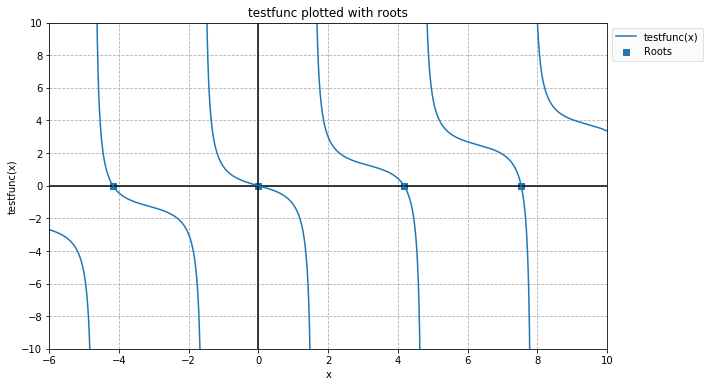

In [13]:
def gen_testfunc_plot():
    plt.figure(figsize=(10,6))
    plt.axis([-6, 10, -10, 10])
    plt.xticks(np.arange(-6, 10 + 2, 2))
    plt.yticks(np.arange(-10, 10 + 2, 2))
    plt.grid(linestyle='dashed')
    #Labels
    plt.xlabel('x')
    plt.ylabel('testfunc(x)')
    plt.title('testfunc plotted with roots')
    # Add x and y-axis to the plot
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    
    #Create the domain to be plotted
    t = np.arange(-6, 10 + 0.01, 0.01)
    
    #Plot testfunc
    y = testfunc(t)
    y[y>20] = np.nan
    plt.plot(t, y, label = 'testfunc(x)')
    
    #Plot roots
    roots = find_roots_newton(testfunc, np.linspace(-1.0, 10.0, 101))
    plt.scatter(roots, np.zeros(len(roots)), marker = 's', label = 'Roots')
    
    #Legend
    legend = plt.legend(bbox_to_anchor=(1, 1), loc=2)
    frame = legend.get_frame()
    frame.set_facecolor('#f9f9f9')
    frame.set_alpha(0.6)
    
gen_testfunc_plot()

From the plot we can clearly see that find_roots_newton correctly found the roots x = 0, x = 4.17, x = 7.53 and that the root x = -4.17 indeed exists.

Therefore we can conclude that the secant method correctly determines roots of testfunc but strays outside of the indicated interval.

## Conclusion
Throughout the assignment we use three different methods of computationally determining the roots of a mathematical function. This assignment highlights the difficulty of representing mathematical functions using computers and attempting to analyze them computationally. We see the greatest effect from floating point approximation which was highlighted in assignment 0, where the effect is precision. Floating point approximation of the numbers makes it difficult for a computer to use boolean statements such as equality to evaluate mathematical functions. We also found another problem in the secant method with using unit steps to change the micro-interval evaluated. With how the secant method works, I was forced to find a different method of creating and iterating through micro-intervals. This is why you see two different methods of using micro-intervals from the brentq and secant evaluations. Furthermore, we learn in the last task that it is essential to properly interpret results calculated using computational methods.